<a href="https://colab.research.google.com/github/Chetnajainmj/Machine-Learning/blob/main/Copy_of_CifarClassification_practice_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading modules and dataset
The very first thing to do when we are about to write a code is importing all required modules


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

The CIFAR-10 dataset itself can either be downloaded manually from this link or directly through the code (using API).the dataset size itself is around 160 MB. After the code finishes running, the dataset is going to be stored automatically to X_train, y_train, X_test and y_test variables, where the training and testing data itself consist of 50000 and 10000 samples respectively.

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


The code below tells the computer that we are about to display the first 50 images in the dataset which are divided into 10 columns and 5 rows. The figsize argument is used just to define the size of our figure. We can see here that I am going to set the title using set_title() and display the images using imshow().

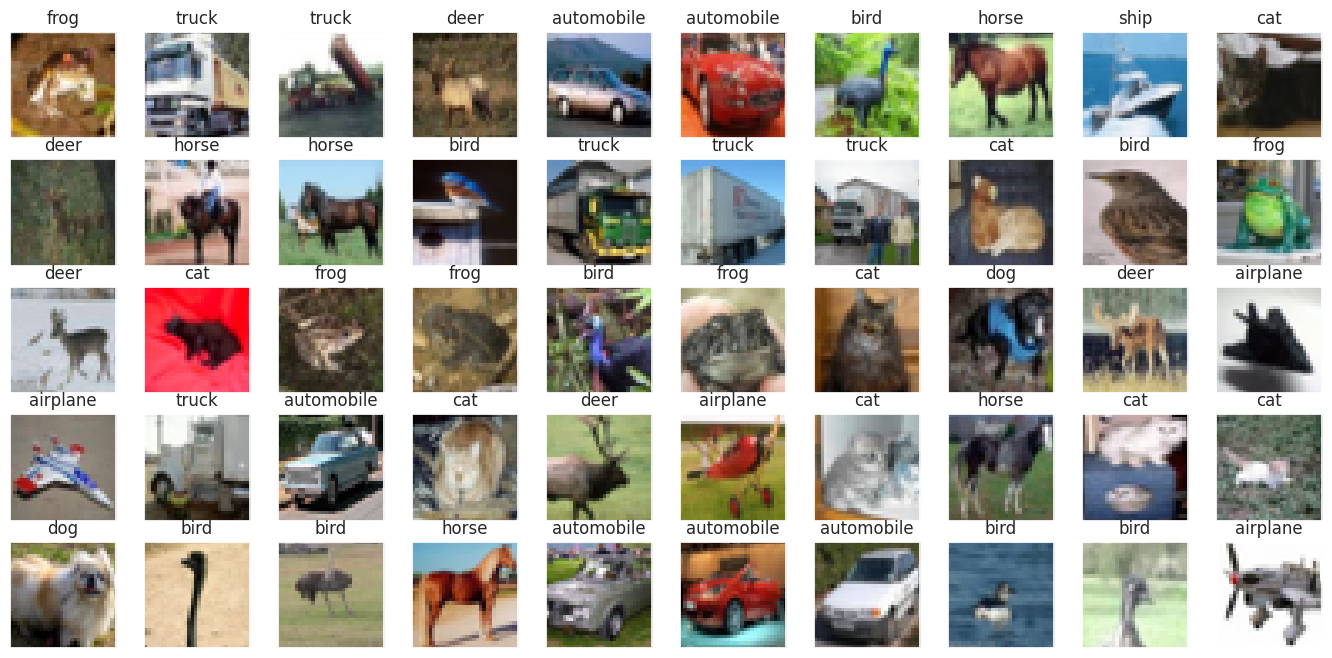

In [3]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
fig, axes = plt.subplots(ncols=10, nrows=5, figsize=(17, 8))
index = 0
for i in range(5):
    for j in range(10):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

convert all those images (both train and test data) into grayscale.


In [4]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

Now picutre in gray


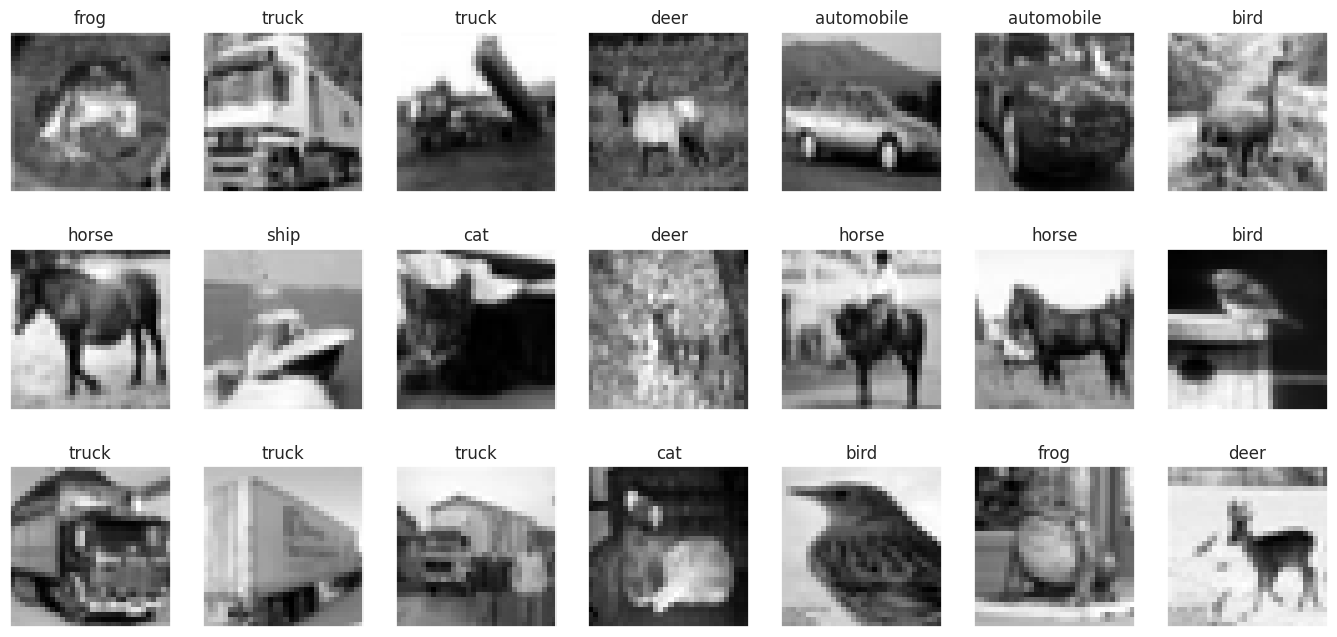

In [5]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

normalize array values. We know that by default the brightness of each pixel in any image are represented using a value which ranges between 0 and 255. In order for neural network to work best, we need to convert this value such that it’s going to be in the range between 0 and 1.

In [6]:
X_train  = X_train/255
X_test  = X_test/255

Data preprcessing

In [7]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse_output=False)

In [8]:
one_hot_encoder = OneHotEncoder( sparse_output=False)
one_hot_encoder.fit(y_test)

OneHotEncoder(sparse_output=False)

In [9]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

the shape of X_train and X_test, the size will be (50000, 32, 32) and (10000, 32, 32) respectively. Well, actually this shape is not acceptable by Conv2D layer that we are going to implement. So, we need to reshape those two arrays using the following code:

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


Now our X_train and X_test shapes are going to be (50000, 32, 32, 1) and (10000, 32, 32, 1), where the number 1 in the last position indicates that we are now using only 1 color channel (gray).

In [12]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(32, 32, 1)

In [78]:
model = Sequential()
model.add(Conv2D(18, (5, 5), activation='relu', strides=(1, 1),
    padding='same', input_shape=input_shape))
model.add(Conv2D(35, (5, 5), activation='relu', strides=(1, 1),
    padding='valid'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1),
    padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu', strides=(1, 1),
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1),
    padding='same'))


model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [79]:
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)              │ (None, 32, 32, 18)     │           468 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 28, 28, 35)     │        15,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 28, 28, 64)     │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 14, 14, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 957,351 (3.65 MB)

 Trainable params: 957,351 (3.65 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(loss='categorical_crossentropy',
     optimizer='adam',
     metrics=['acc'])

In [81]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [82]:
print(X_train.shape)

(50000, 32, 32, 1)


In [84]:
history = model.fit(X_train, y_train, epochs=30, batch_size=200, validation_data=(X_test, y_test))

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.8432 - loss: 0.4542 - val_acc: 0.7045 - val_loss: 0.9562
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - acc: 0.8611 - loss: 0.4017 - val_acc: 0.7147 - val_loss: 0.9636
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - acc: 0.8836 - loss: 0.3294 - val_acc: 0.7134 - val_loss: 1.0233
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - acc: 0.8944 - loss: 0.2985 - val_acc: 0.7148 - val_loss: 1.0427
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - acc: 0.9101 - loss: 0.2572 - val_acc: 0.7025 - val_loss: 1.1544
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - acc: 0.9220 - loss: 0.2233 - val_acc: 0.7106 - val_loss: 1.2534
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - acc: 0.9283 - loss: 0.2059 - val_acc: 0.7105 - val_loss: 1.2736
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - acc: 0.9348 - loss: 0.1846 - val_acc: 0.7038 - val_loss: 1.2880
Epoch 9/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 

Test loss: 1.7071150541305542 / Test accuracy: 0.7095000147819519


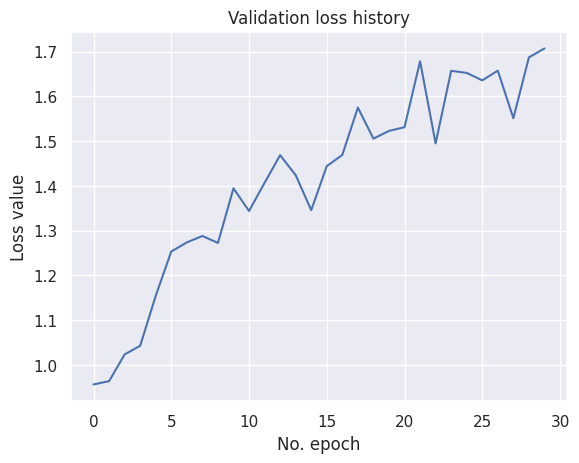

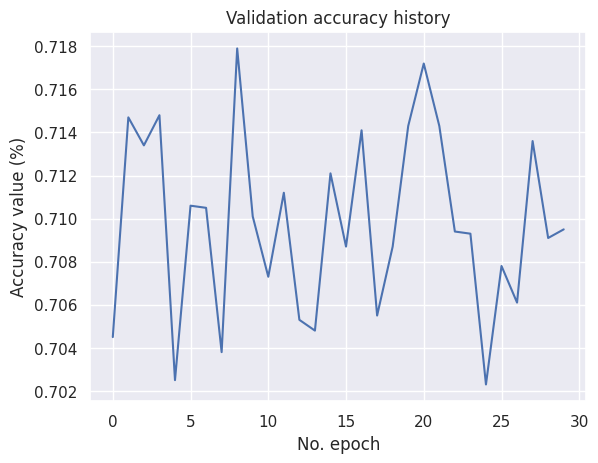

In [85]:
# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_acc'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

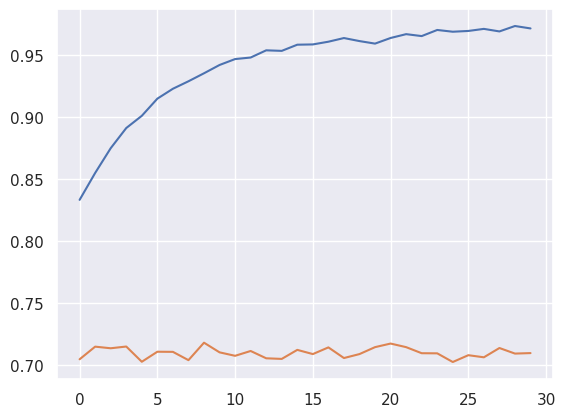

In [86]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.show()

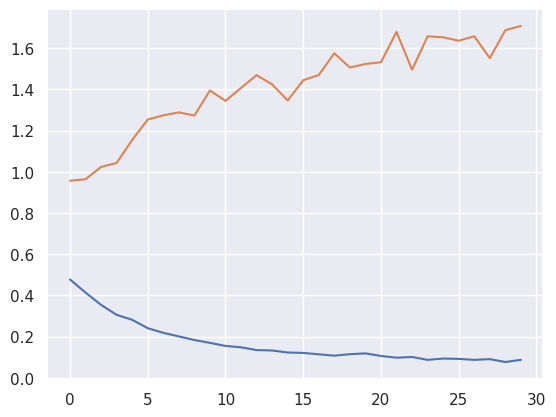

In [87]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [88]:
predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [89]:
y_test = one_hot_encoder.inverse_transform(y_test)
y_test


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [90]:
cm = confusion_matrix(y_test, predictions)

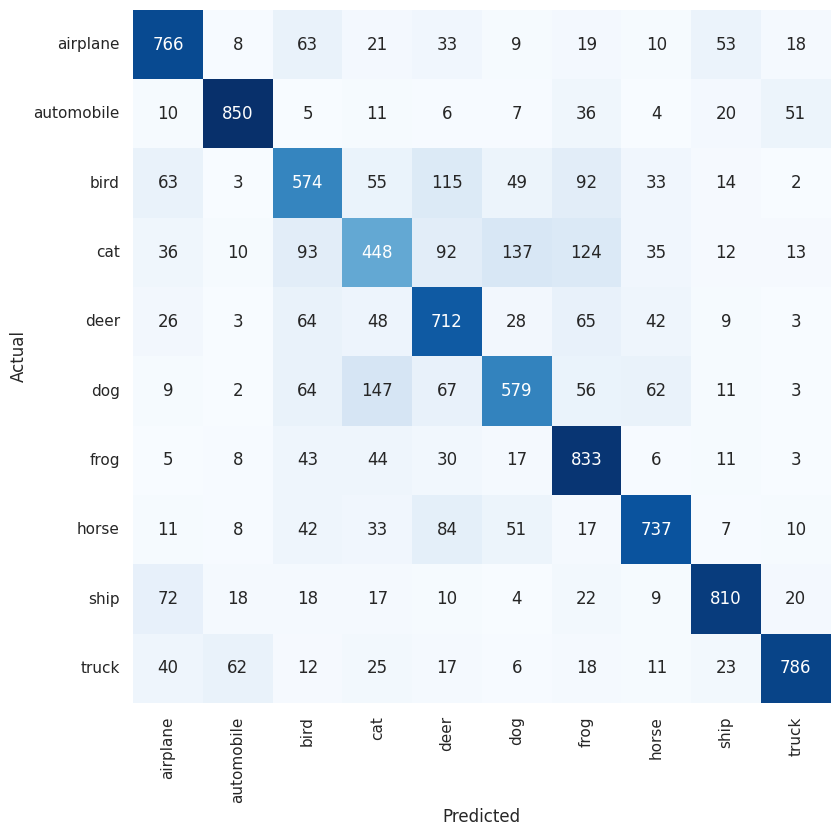

In [91]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt="d", annot=True, cmap=plt.cm.Blues)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [92]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [93]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

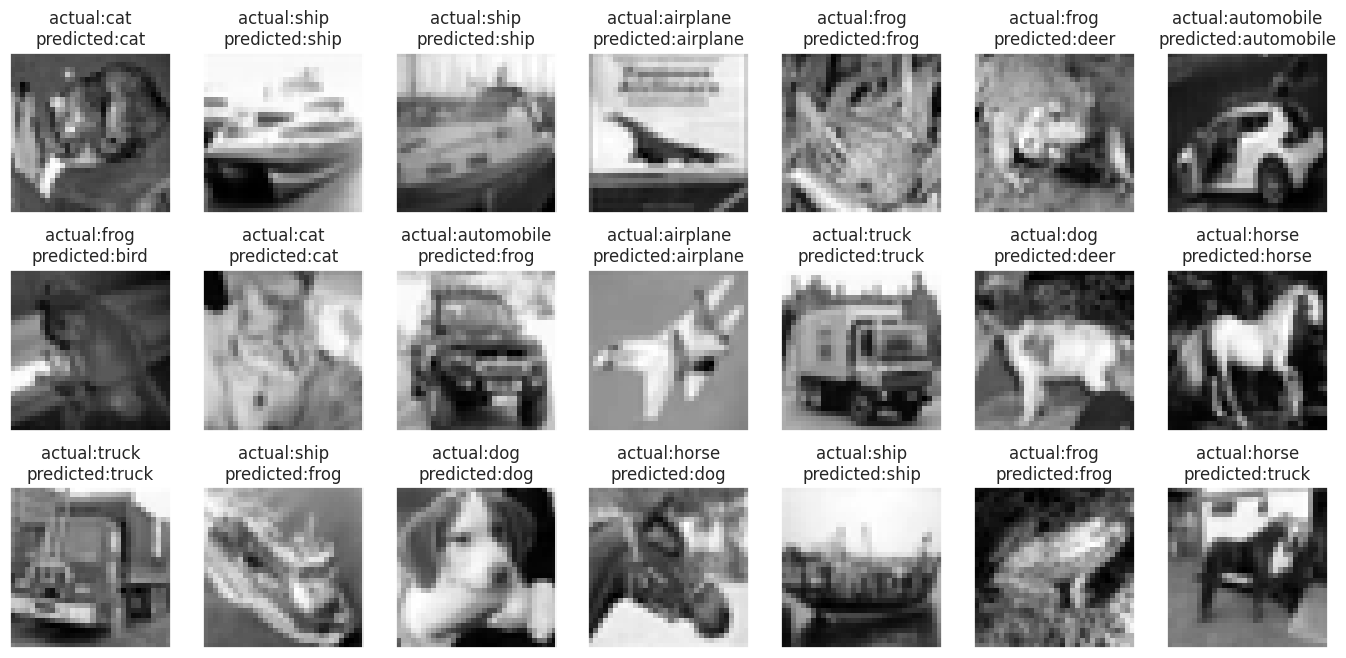

In [94]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n'
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()